# 3D Plotting with Matplotlib
## Milestone 3: Visualize on a 3D Surface Plot

### Objective
In this milestone, you will visualize the patterns in bikes rented hourly in each month. You will create three 3-dimensional plots—a wireframe plot, contour plot, and surface plot with month names on the x-axis, hours on the y-axis, and mean number of bikes rented on the z-axis. You will add a new column Month to your DataFrame for this. This Month column will be extracted from the Date column in original datafile. You will use a pivot table to get data ready for your plot. You will also learn to rotate the axis of your 3D plot by specific elevation and azimuth in degrees.    

### Importance of the Project
The 3D plots created in this milestone will enable you to visualize the influence of two features—hour of the day and month of the year on the mean number of bikes rented. You will learn how to create and customize your plot, add subplots to your figure, and rotate a plot.

### 1. Import libraries and read the dataset into a DataFrame.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
from mpl_toolkits import mplot3d

In [44]:
data_loc = "./data/"
img_loc = "./img/"

In [45]:
bikes = pd.read_csv(data_loc + "SeoulBikeData.csv",  
                    encoding = 'unicode_escape',   
                    parse_dates=['Date'],
                    date_format = "%d/%m/%Y"  
                  )

In [46]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [47]:
bikes.sample(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
1859 2018-02-16                 93    11              1.0           25   
2262 2018-03-05                 20     6              4.2           87   
6794 2018-09-10                332     2             20.0           59   
3855 2018-05-10                  0    15             20.4           51   
5955 2018-08-06                219     3             28.6           81   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
1859               1.4              1782                      -16.8   
2262               2.0              1979                        2.2   
6794               1.5              2000                       11.7   
3855               4.0               946                        9.9   
5955               1.1              1105                       25.0   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
1859                     1.70           0.0            0.0  Winter   
2262                     0.00           2.0            0.0  Spring   
6794                     0.00           0.0            0.0  Autumn   
3855                     2.87           0.0            0.0  Spring   
5955                     0.00           0.0            0.0  Summer   

         Holiday Functioning Day  
1859     Holiday             Yes  
2262  No Holiday             Yes  
6794  No Holiday             Yes  
3855  No Holiday              No  
5955  No Holiday             Yes

### 2. Add a new column Month to your DataFrame

In [48]:
from datetime import datetime

In [49]:
bikes["Month"] = bikes["Date"].dt.month

In [50]:
bikes[["Date","Month"]].sample(10)

Date  Month
1548 2018-02-03      2
4853 2018-06-21      6
2594 2018-03-19      3
1645 2018-02-07      2
5705 2018-07-26      7
2176 2018-03-01      3
255  2017-12-11     12
6886 2018-09-13      9
2575 2018-03-18      3
1455 2018-01-30      1

In [51]:
# This line of code creates a list of all Matplotlib rcParams (runtime configuration parameters) whose names contain the string "wspace".
# It identifies parameters that control horizontal spacing between subplots, such as "figure.subplot.wspace".
[param for param in list(plt.rcParams.keys()) if "wspace" in param]

['figure.constrained_layout.wspace', 'figure.subplot.wspace']

In [52]:
# This code uses a list comprehension with pandas.Timestamp to generate a list of abbreviated month names ('Jan' through 'Dec'). 
# For each month number from 1 to 12, it creates a dummy date (day=1, year=2024), extracts the month name, and slices it to the first three characters.
month_names = [pd.Timestamp(year = 2024, day = 1, month = m).month_name()[:3] for m in range(1,13)]
month_names

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

#### Code Explanation

```python
month_names = [pd.Timestamp(year=2024, day=1, month=m).month_name()[:3] for m in range(1,13)]
```

1. **`for m in range(1, 13)`**

   * Loops through the numbers `1` to `12`.
   * Each number represents a month of the year (1 = January, 2 = February, … 12 = December).

2. **`pd.Timestamp(year=2024, day=1, month=m)`**

   * Creates a Pandas Timestamp object, which is like a smart datetime object.
   * Example: `pd.Timestamp(year=2024, month=3, day=1)` → `"2024-03-01 00:00:00"`.
   * The year (2024) and day (1) are arbitrary here — the important part is the month (`m`).

3. **`.month_name()`**

   * Returns the full month name from the timestamp.
   * Example: `pd.Timestamp(..., month=3).month_name()` → `"March"`.

4. **`[:3]`**

   * Slices the string to keep only the first 3 characters.
   * `"March"[:3]` → `"Mar"`.

5. **List comprehension**

   * Builds a list of all the 3-letter month abbreviations.

In [53]:
months = pd.Series(month_names, index = range(1,13))
months

1     Jan
2     Feb
3     Mar
4     Apr
5     May
6     Jun
7     Jul
8     Aug
9     Sep
10    Oct
11    Nov
12    Dec
dtype: object

### 3. Create a pivot table for Rented Bike Count, with Hour as index and Month as columns
This pivot table will contain the mean of Rented Bike Counts for every hour for every month. Round these values to two decimal places using round() function.

In [54]:
bikes[["Hour","Month","Rented Bike Count"]].sample(5)

Hour  Month  Rented Bike Count
4688     8      6                187
3304    16      4               1312
7819    19     10               1860
2476     4      3                 82
7388    20     10                  0

In [55]:
# This line groups the bikes dataset by both hour of the day and month, 
# then calculates the mean number of rentals for each hour–month combination. 
# The results are rounded to two decimals, and then first eight rows are displayed as a preview.
# The idea is to use this to check the results of the pivot_table method in the next cell
bikes[["Hour","Month","Rented Bike Count"]].groupby(["Hour","Month"]).mean().round(2).head(8)

Rented Bike Count
Hour Month                   
0    1                 144.10
     2                 146.89
     3                 295.39
     4                 474.30
     5                 642.32
     6                 989.17
     7                 881.65
     8                 829.29

In [56]:
# This code builds a pivot table where each row represents an hour of the day (0–23), 
# each column represents a month (1–12), 
# and each cell contains the mean number of bikes rented at that hour and month. 
# The results are rounded to two decimals, producing a compact table of hourly–monthly averages.
bikes.pivot_table(values = "Rented Bike Count",
                               index = "Hour", 
                               columns = "Month", 
                               aggfunc = "mean").round(2)

Month      1       2        3        4        5        6        7        8   \
Hour                                                                          
0      144.10  146.89   295.39   474.30   642.32   989.17   881.65   829.29   
1      138.00  140.43   243.55   346.37   477.87   766.30   692.42   639.77   
2      101.68   99.96   172.65   237.37   332.06   567.07   503.39   448.77   
3       64.94   67.04   110.74   155.07   228.32   369.03   351.10   308.74   
4       43.35   45.93    73.45    98.73   145.19   240.70   229.71   201.58   
5       48.58   44.64    73.65   108.47   158.68   257.80   261.42   218.97   
6       89.52   94.11   157.94   254.47   342.61   509.53   502.19   446.55   
7      194.77  217.32   421.61   622.47   762.32  1031.40   903.06   778.03   
8      397.35  426.64   749.42  1069.97  1223.97  1606.90  1400.61  1254.35   
9      240.10  253.04   489.52   661.07   817.03  1086.53   865.94   786.19   
10     170.00  187.93   395.32   555.00   725.00   919.80   658.35   598.68   
11     207.97  230.11   482.19   686.80   831.61  1018.53   699.00   650.52   
12     243.19  266.14   595.10   866.87   994.19  1173.13   778.32   686.03   
13     247.35  272.43   634.10   892.10  1075.10  1210.53   795.26   675.13   
14     251.90  285.64   695.90   908.63  1112.19  1259.93   775.23   660.65   
15     257.03  310.89   782.77   932.80  1191.55  1404.43   863.06   774.39   
16     257.55  319.61   822.06  1052.33  1357.32  1613.00  1029.32   894.35   
17     299.32  358.21   917.52  1253.40  1666.87  1994.37  1385.19  1214.42   
18     385.65  471.07  1174.84  1657.77  2125.32  2494.50  2085.94  1836.58   
19     266.39  317.68   795.48  1184.30  1680.81  2212.10  1824.84  1641.23   
20     221.35  244.57   652.97  1028.13  1430.97  2088.70  1772.65  1553.68   
21     218.58  239.11   621.13   973.83  1401.00  1984.50  1747.48  1537.65   
22     201.61  220.46   550.77   854.10  1228.10  1782.57  1557.45  1370.52   
23     148.61  162.75   369.16   599.90   858.87  1315.70  1128.68  1022.55   

Month       9        10       11      12  
Hour                                      
0       763.40   631.23   476.17  202.77  
1       592.40   477.55   387.47  196.94  
2       394.80   334.71   265.93  150.00  
3       265.10   229.61   181.77  100.42  
4       175.90   150.61   119.20   61.71  
5       165.07   149.29   116.43   59.81  
6       353.17   336.55   257.70   94.97  
7       725.77   759.71   619.17  217.35  
8      1145.30  1282.48  1161.07  443.03  
9       765.00   805.42   693.50  270.52  
10      682.70   681.84   543.97  201.42  
11      780.93   755.35   606.50  247.06  
12      900.50   897.16   695.97  281.81  
13      975.83   976.58   722.23  305.71  
14     1041.63  1044.55   737.83  315.45  
15     1140.77  1153.26   790.63  329.19  
16     1299.83  1286.19   862.77  349.65  
17     1590.93  1531.68  1046.10  371.52  
18     2009.93  1908.58  1372.87  461.35  
19     1643.57  1416.29   984.97  329.35  
20     1486.07  1219.03   822.87  263.90  
21     1397.93  1163.35   785.23  263.68  
22     1236.07  1040.74   740.07  252.87  
23      921.13   757.74   533.43  207.90

#### Code Explanation

```python
bikes.pivot_table(
    values="Rented Bike Count",
    index="Hour",
    columns="Month",
    aggfunc="mean"
).round(2)
```

1. **`bikes.pivot_table(...)`**

   * Creates a new table (a DataFrame) where you reorganize your data into rows (`index`), columns (`columns`), and values (`values`).

---

2. **`values="Rented Bike Count"`**

   * This tells Pandas: *“What number should I put inside the table cells?”*
   * Here it’s the `"Rented Bike Count"`.

---

3. **`index="Hour"`**

   * Rows of the pivot table will be hours (0–23).

---

4. **`columns="Month"`**

   * Columns of the pivot table will be months (1–12).

---

5. **`aggfunc="mean"`**

   * Since there could be multiple rows for the same hour and month, Pandas needs to know how to combine them.
   * Here, it takes the average rentals. This means that each cell will contain the average number of rentals at that hour in that month.

---

6. **`.round(2)`**

   * Rounds the final numbers to 2 decimal places.


In [57]:
bikes_grid = bikes.pivot_table(values = "Rented Bike Count",
                               index = "Hour", 
                               columns = "Month", 
                               aggfunc = "mean").round(0).astype(int)

In [58]:
bikes_grid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 0 to 23
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       24 non-null     int64
 1   2       24 non-null     int64
 2   3       24 non-null     int64
 3   4       24 non-null     int64
 4   5       24 non-null     int64
 5   6       24 non-null     int64
 6   7       24 non-null     int64
 7   8       24 non-null     int64
 8   9       24 non-null     int64
 9   10      24 non-null     int64
 10  11      24 non-null     int64
 11  12      24 non-null     int64
dtypes: int64(12)
memory usage: 2.4 KB


In [59]:
bikes_grid

Month   1    2     3     4     5     6     7     8     9     10    11   12
Hour                                                                      
0      144  147   295   474   642   989   882   829   763   631   476  203
1      138  140   244   346   478   766   692   640   592   478   387  197
2      102  100   173   237   332   567   503   449   395   335   266  150
3       65   67   111   155   228   369   351   309   265   230   182  100
4       43   46    73    99   145   241   230   202   176   151   119   62
5       49   45    74   108   159   258   261   219   165   149   116   60
6       90   94   158   254   343   510   502   447   353   337   258   95
7      195  217   422   622   762  1031   903   778   726   760   619  217
8      397  427   749  1070  1224  1607  1401  1254  1145  1282  1161  443
9      240  253   490   661   817  1087   866   786   765   805   694  271
10     170  188   395   555   725   920   658   599   683   682   544  201
11     208  230   482   687   832  1019   699   651   781   755   606  247
12     243  266   595   867   994  1173   778   686   900   897   696  282
13     247  272   634   892  1075  1211   795   675   976   977   722  306
14     252  286   696   909  1112  1260   775   661  1042  1045   738  315
15     257  311   783   933  1192  1404   863   774  1141  1153   791  329
16     258  320   822  1052  1357  1613  1029   894  1300  1286   863  350
17     299  358   918  1253  1667  1994  1385  1214  1591  1532  1046  372
18     386  471  1175  1658  2125  2494  2086  1837  2010  1909  1373  461
19     266  318   795  1184  1681  2212  1825  1641  1644  1416   985  329
20     221  245   653  1028  1431  2089  1773  1554  1486  1219   823  264
21     219  239   621   974  1401  1984  1747  1538  1398  1163   785  264
22     202  220   551   854  1228  1783  1557  1371  1236  1041   740  253
23     149  163   369   600   859  1316  1129  1023   921   758   533  208

In [60]:
bikes_grid.shape

(24, 12)

### 4. Create a mesh grid of values for plotting 3D plots
Use the NumPy meshgrid() function to create a mesh grid of the values representing length of columns and the length of index of the pivot table created in Step 2. We have twelve columns, one for each month, and 24 rows, one for each hour. The output of meshgrid() is returned in the variables x and y.

### 5. Get the rounded data values from the pivot table in variable z

In [61]:
# `np.meshgrid` generates two coordinate matrices, `X` and `Y`, representing all combinations of month (columns) and hour (rows). 
# These arrays are typically used as input for plotting functions like surface plots or contour plots, where you need explicit x, y grid coordinates alongside your z-values (`bikes_grid`).
X, Y = np.meshgrid(bikes_grid.columns, bikes_grid.index)

#### Code Explanation

```python
X, Y = np.meshgrid(bikes_grid.columns, bikes_grid.index)
```

1. **`bikes_grid.columns`**

   * This is the list of months (`1, 2, 3, …, 12`).

2. **`bikes_grid.index`**

   * This is the list of hours (`0, 1, 2, …, 23`).

3. **`np.meshgrid(...)`**

   * This function takes two 1D arrays (months and hours) and produces two 2D arrays (`X` and `Y`) that represent **all combinations** of those coordinates.

   * `X` repeats the month values across rows.

   * `Y` repeats the hour values across columns.

These `X, Y` arrays align perfectly with the values in `bikes_grid`, so we can now plot the data in a 2D grid (for example, with a **surface plot** or **contour plot** in Matplotlib).

---

##### Example (simplified)

If months = `[1, 2, 3]` and hours = `[0, 1]`:

```python
X =
[[1, 2, 3],
 [1, 2, 3]]

Y =
[[0, 0, 0],
 [1, 1, 1]]
```

So `(X[i,j], Y[i,j])` gives you the month/hour coordinates for each cell of `bikes_grid`.

In [62]:
bikes_grid.columns.shape

(12,)

In [63]:
bikes_grid.index.shape

(24,)

In [64]:
X

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,

In [65]:
X.shape

(24, 12)

In [66]:
Y

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
       [ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
       [ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6],
       [ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7],
       [ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8],
       [ 9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
       [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
       [13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
       [14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14],
       [15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15],
       [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16],
       [17, 17, 17, 17, 17, 17,

In [67]:
Y.shape

(24, 12)

In [68]:
Z = np.array(bikes_grid)

In [69]:
Z

array([[ 144,  147,  295,  474,  642,  989,  882,  829,  763,  631,  476,
         203],
       [ 138,  140,  244,  346,  478,  766,  692,  640,  592,  478,  387,
         197],
       [ 102,  100,  173,  237,  332,  567,  503,  449,  395,  335,  266,
         150],
       [  65,   67,  111,  155,  228,  369,  351,  309,  265,  230,  182,
         100],
       [  43,   46,   73,   99,  145,  241,  230,  202,  176,  151,  119,
          62],
       [  49,   45,   74,  108,  159,  258,  261,  219,  165,  149,  116,
          60],
       [  90,   94,  158,  254,  343,  510,  502,  447,  353,  337,  258,
          95],
       [ 195,  217,  422,  622,  762, 1031,  903,  778,  726,  760,  619,
         217],
       [ 397,  427,  749, 1070, 1224, 1607, 1401, 1254, 1145, 1282, 1161,
         443],
       [ 240,  253,  490,  661,  817, 1087,  866,  786,  765,  805,  694,
         271],
       [ 170,  188,  395,  555,  725,  920,  658,  599,  683,  682,  544,
         201],
       [ 208,  230,  

In [70]:
Z.shape

(24, 12)

In [71]:
X[23,3]

4

In [72]:
Y[23,3]

23

In [73]:
Z[23,3]

600

In [74]:
# check
bikes_grid.iloc[23,3]

600

In [75]:
type(bikes_grid)

pandas.core.frame.DataFrame

In [76]:
bikes_grid.columns

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='Month')

In [77]:
bikes_grid.index

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='int64', name='Hour')

#### Plot the meshgrig

In [78]:
month_names

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

### 6. Initialize the figure object
Our figure will have four subplots.

#### Grid of 3D subplots with `figure` and `add_subplot`

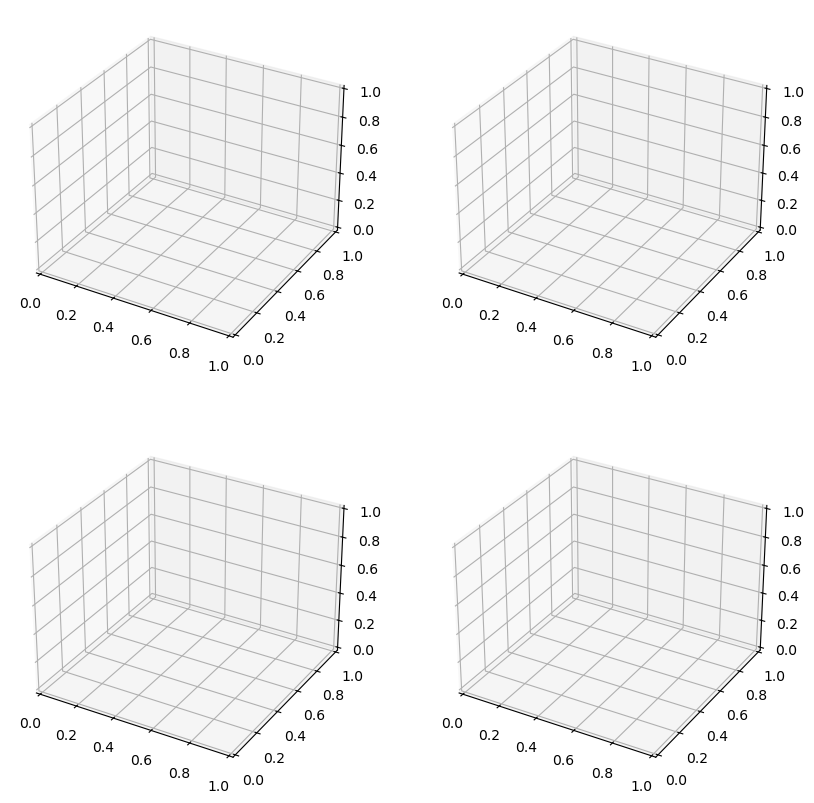

In [79]:
fig = plt.figure(figsize = (10,10))
ax0 = fig.add_subplot(2, 2, 1, projection='3d')
ax1 = fig.add_subplot(2, 2, 2, projection='3d')
ax2 = fig.add_subplot(2, 2, 3, projection='3d')
ax3 = fig.add_subplot(2, 2, 4, projection='3d')
plt.show()

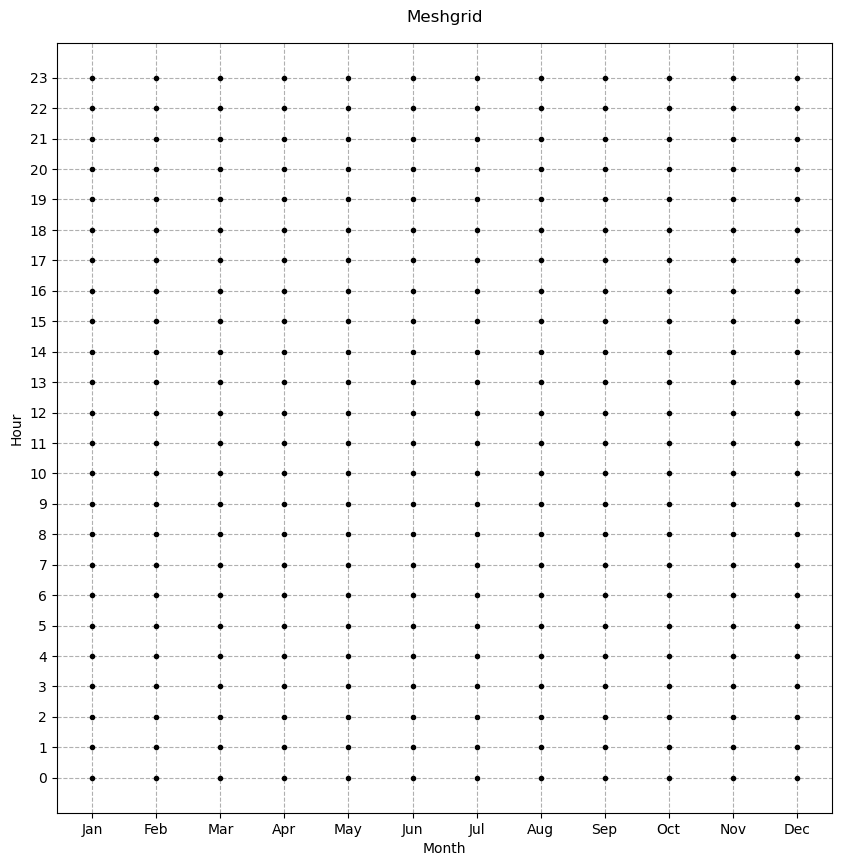

In [80]:
# Print the meshgrid
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(X, Y, marker='.', color='k', linestyle='none')
ax.set( xticks = range(1,13,1), xticklabels = month_names,  xlabel = "Month",
        yticks = range(0,24), yticklabels = range(0,24), ylabel = "Hour")
ax.grid(linestyle = '--')
ax.set_title("Meshgrid",pad = 15)
plt.show()

#### Grid of 3D subplots with `subplots`

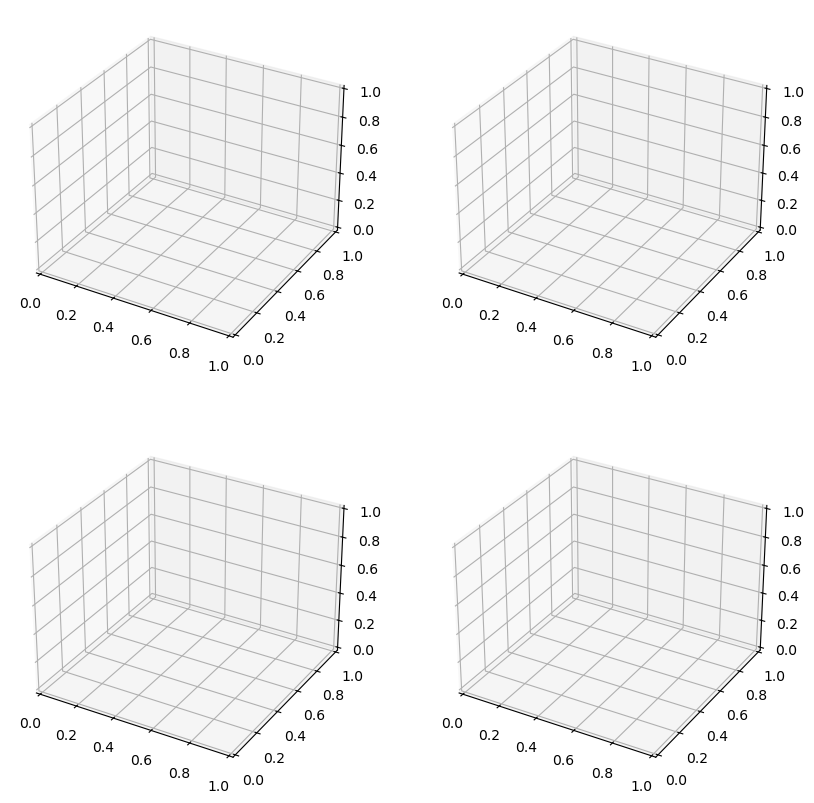

In [81]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(
        figsize = (10,10), 
        nrows =2, 
        ncols = 2, 
        subplot_kw=dict(projection='3d'))
plt.show()

In [82]:
ax0

<Axes3D: >

In [83]:
ax1

<Axes3D: >

In [84]:
ax2

<Axes3D: >

In [85]:
ax3

<Axes3D: >

### 7. Create the first subplot—a 3D wireframe plot
Use the x, y, and z computed in Steps 4 and 5
Use fig.add_subplot() and ax.plot_wireframe() functions.

In [86]:
[param for param in list(plt.rcParams.keys()) if "title" in param]

['axes.titlecolor',
 'axes.titlelocation',
 'axes.titlepad',
 'axes.titlesize',
 'axes.titleweight',
 'axes.titley',
 'figure.titlesize',
 'figure.titleweight',
 'legend.title_fontsize']

In [87]:
plt.rc("axes",  titlesize = 13, titleweight = "light", labelsize = 9)
plt.rc("xtick", labelsize = 8)
plt.rc("ytick", labelsize = 8)

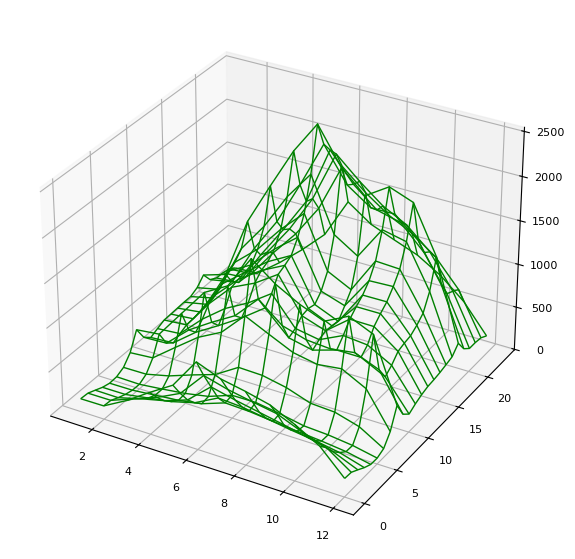

In [89]:
fig, ax = plt.subplots(figsize = (10,7),  
                       subplot_kw = dict(projection='3d'))
ax.plot_wireframe(X, Y, Z, color="green", linewidth = 1)
plt.show()

#### Wireframe

#### **1. Plot Overview**

* This is a **3D wireframe plot**, which is like draping a mesh grid over your data surface.
* The **x-axis** represents the months, the **y-axis** represents the hours of the day, and the **z-axis** shows the average number of bikes rented.
* The lines of the wireframe help you see the "shape" of the data across time.
* You can read it by looking at peaks (where the wireframe rises up high on the z-axis) and valleys (where it dips low).

This visualization helps answer:

* *At which months and hours are bike rentals the highest?*
* *Do we see daily peaks (like commuting hours) repeating across months?*
* *How does rental demand vary seasonally and hourly at the same time?*

---

#### **2. Code Breakdown**

```python
fig, ax = plt.subplots(figsize=(10,7), subplot_kw=dict(projection='3d'))
```

* Creates a figure (`fig`) with one subplot (`ax`).
* `figsize=(10,7)` makes the plot larger (10 inches by 7 inches).
* `subplot_kw=dict(projection='3d')` tells Matplotlib to make a 3D plot.

```python
ax.plot_wireframe(X, Y, Z, color="green", linewidth=1)
```

* `X, Y` are the coordinate grids you created with `np.meshgrid` (months and hours).
* `Z` is the pivot table of average rentals.
* `plot_wireframe` draws a mesh across all those coordinates.
* `color="green"` → wireframe is green.
* `linewidth=1` → the lines are thin, so the structure is clear without being too heavy.

```python
plt.show()
```

* Displays the final wireframe plot.

---

#### **3. Visual Elements Analysis: Answer the following questions**

* What do you notice about the z-axis scale — where do the highest peaks in rentals occur?

---

#### **4. Data Interpretation: Answer the following questions**

* At which hours of the day do you see the highest peaks, and do these peaks repeat across months?
* Do some months appear consistently higher in rentals, suggesting seasonal patterns?
* Are there flat regions where rentals stay low regardless of the hour?
* Do you spot any sharp jumps or irregularities in the wireframe that might suggest anomalies in the data?

---

#### **5. Learning Points**

* **Key Matplotlib concepts:**

  * How to use `plot_wireframe` for 3D surface visualization.
  * The role of `np.meshgrid` in preparing X and Y grids.
  * Customizing colors and line widths for readability.
* **When to use this plot:**

  * To show how a variable (bike rentals) changes across two independent dimensions (hour and month).
  * It’s most useful for showing general "shape" and patterns in the data.
* **Common student mistakes:**

  * Forgetting to create `X, Y` grids with `meshgrid`, leading to dimension mismatch errors.
  * Using too thick a line width, which makes the mesh look cluttered.
  * Not labeling axes, which makes it hard to interpret.
* **One suggestion for improvement:**

  * Add **axis labels and a title** (e.g., "Monthly and Hourly Bike Rental Patterns") so that the plot is self-explanatory to others.

---

✨ You’re doing great — wireframes are a foundational 3D tool. Once you’re comfortable here, the next step is to compare it with a **surface plot** (`ax.plot_surface`), which fills in the mesh with color to emphasize peaks and valleys.

👉 Would you like me to show you how to extend this wireframe into a **colored surface plot** for even clearer interpretation?


In [56]:
SeptG = [9]
Xsep, Ysep = np.meshgrid(SeptG, bikes_grid.index)

In [57]:
Xsep.shape

(24, 1)

In [58]:
Ysep.shape

(24, 1)

In [59]:
Zsep = Z[:,8]
Zsep

array([ 763,  592,  395,  265,  176,  165,  353,  726, 1145,  765,  683,
        781,  900,  976, 1042, 1141, 1300, 1591, 2010, 1644, 1486, 1398,
       1236,  921])

In [60]:
Zsep = Zsep.reshape(24,1)
Zsep

array([[ 763],
       [ 592],
       [ 395],
       [ 265],
       [ 176],
       [ 165],
       [ 353],
       [ 726],
       [1145],
       [ 765],
       [ 683],
       [ 781],
       [ 900],
       [ 976],
       [1042],
       [1141],
       [1300],
       [1591],
       [2010],
       [1644],
       [1486],
       [1398],
       [1236],
       [ 921]])

In [61]:
Zsep.shape

(24, 1)

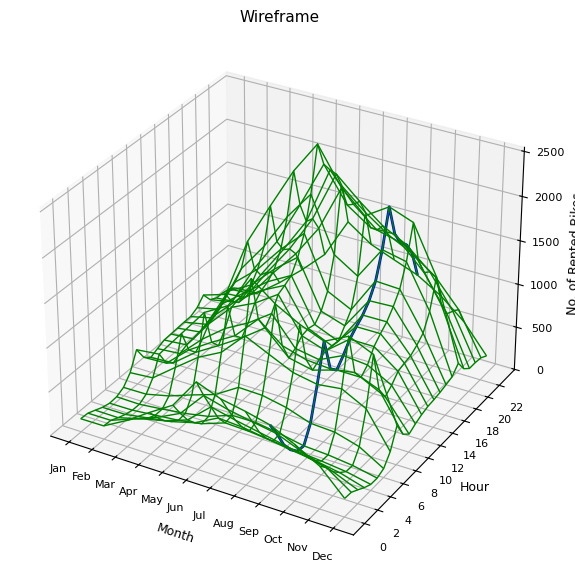

In [62]:
fig, ax = plt.subplots(figsize = (10,7),  
                       subplot_kw=dict(projection='3d'))
ax.plot_wireframe(X, Y, Z, color="green", linewidth = 1)
ax.set( xticks = range(1,13,1), xticklabels = order_months,  
           xlabel = "Month",
        yticks = range(0,24,2), yticklabels = range(0,24,2), 
           ylabel = "Hour",
        zlabel = "No. of Rented Bikes",
)
ax.plot_wireframe(Xsep, Ysep, Zsep, color = "blue", 
                  linewidth =2)
ax.set_title(label = "Wireframe", fontsize = 11)
fig.savefig(img_loc+"Wireframe_with_line.png" , dpi = 400)
plt.show()

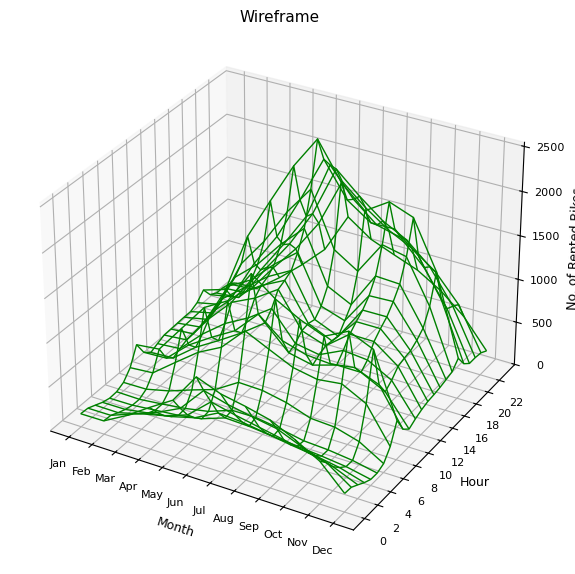

In [63]:
fig, ax = plt.subplots(figsize = (10,7),  
                       subplot_kw=dict(projection='3d'))
ax.plot_wireframe(X, Y, Z, color="green", linewidth = 1)
ax.set( xticks = range(1,13,1), xticklabels = order_months,  
           xlabel = "Month",
        yticks = range(0,24,2), yticklabels = range(0,24,2), 
           ylabel = "Hour",
        zlabel = "No. of Rented Bikes",
)
ax.set_title(label = "Wireframe", fontsize = 11, pad =0)
fig.savefig(img_loc+"Wireframe.png" , dpi = 400)
plt.show()

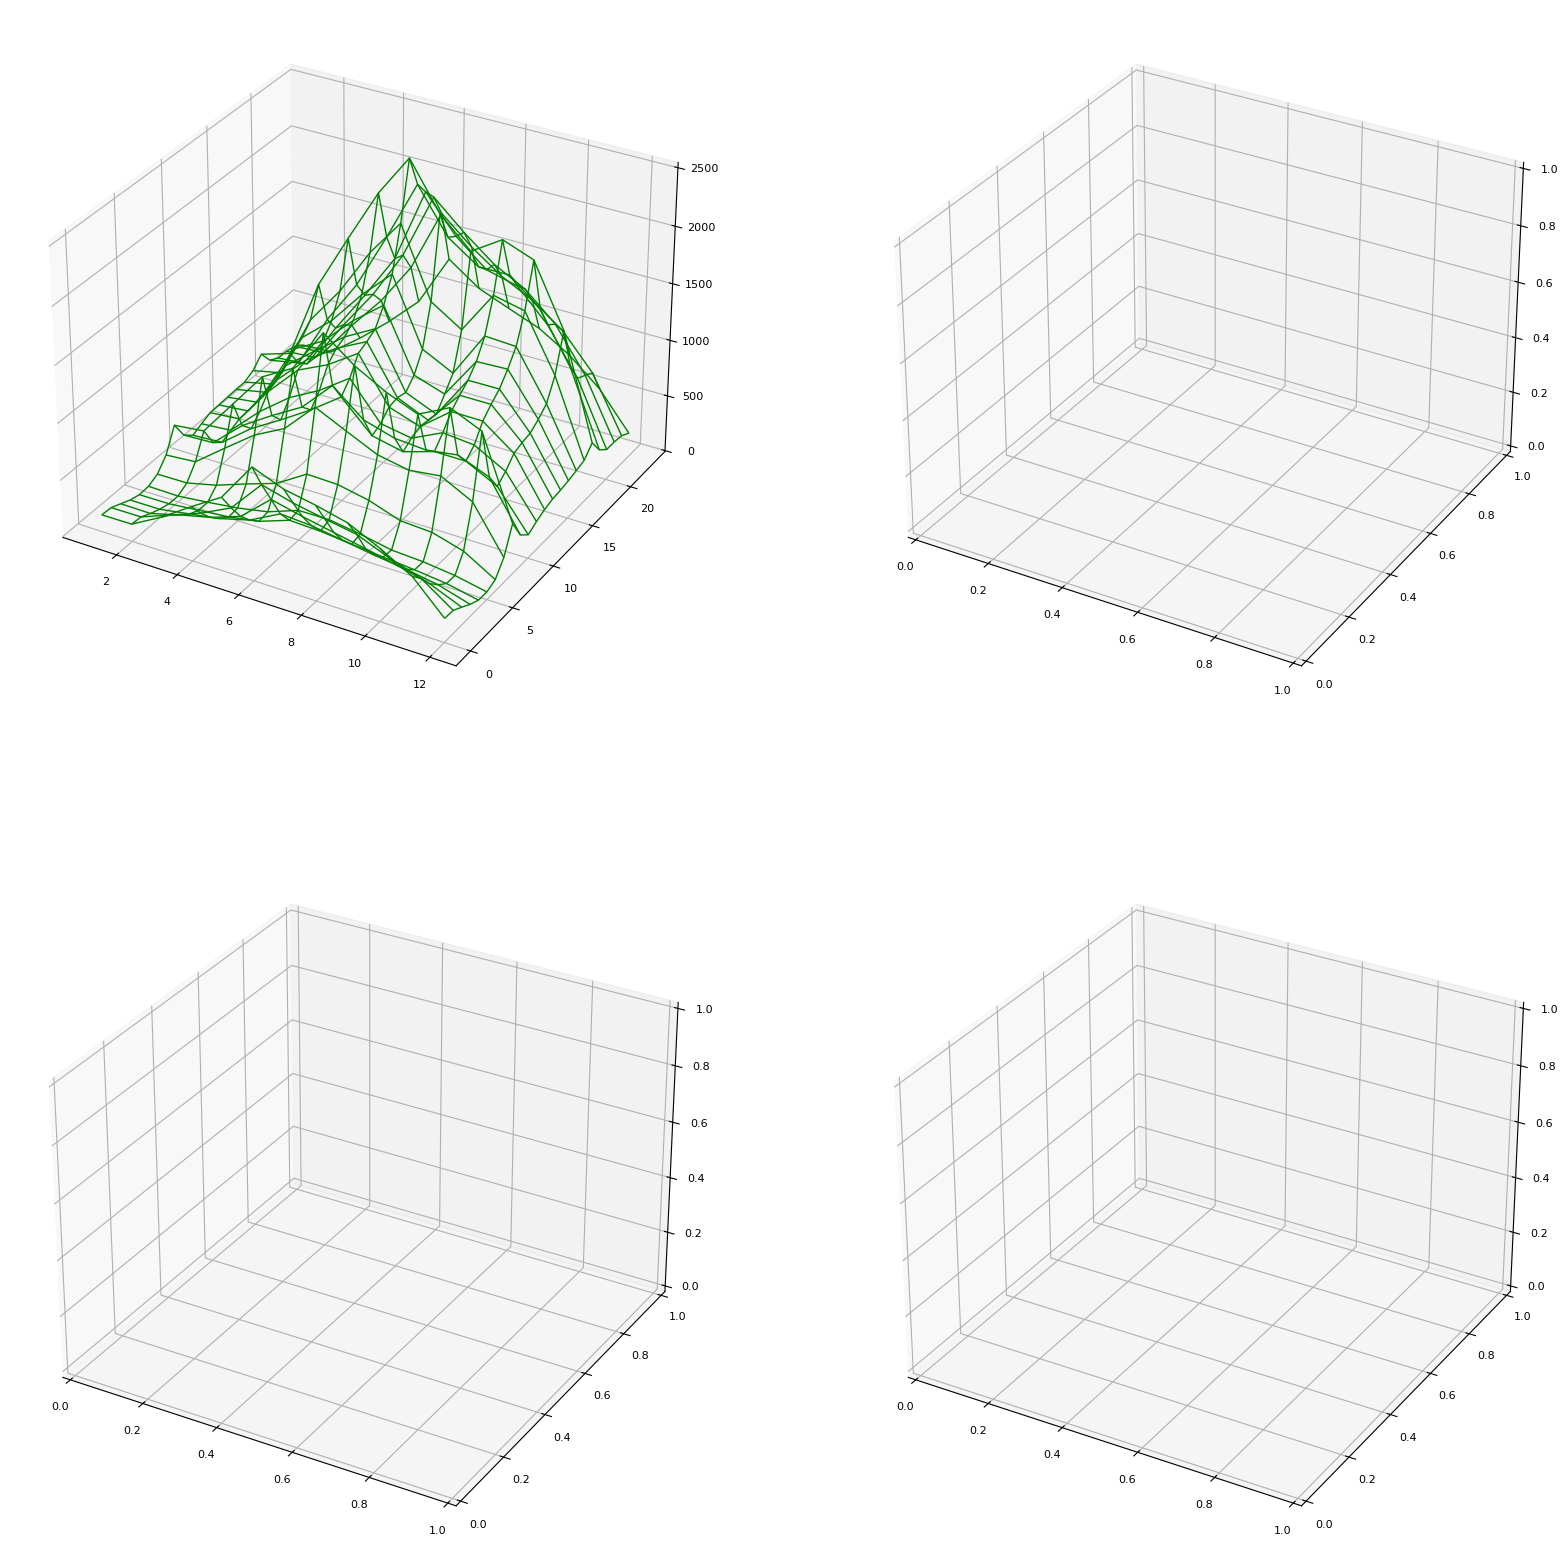

In [64]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(
        figsize = (20,20), nrows =2, ncols = 2, subplot_kw=dict(projection='3d'))
ax0.plot_wireframe(X, Y, Z, color="green", linewidth = 1)

plt.show()

### 8. Set the ticks, tick labels, axes labels, and plot title for the subplot 
- x-axis shows month names.
- y-axis shows hours.
- You can retain default ticks for the z-axis that shows mean number of bikes.

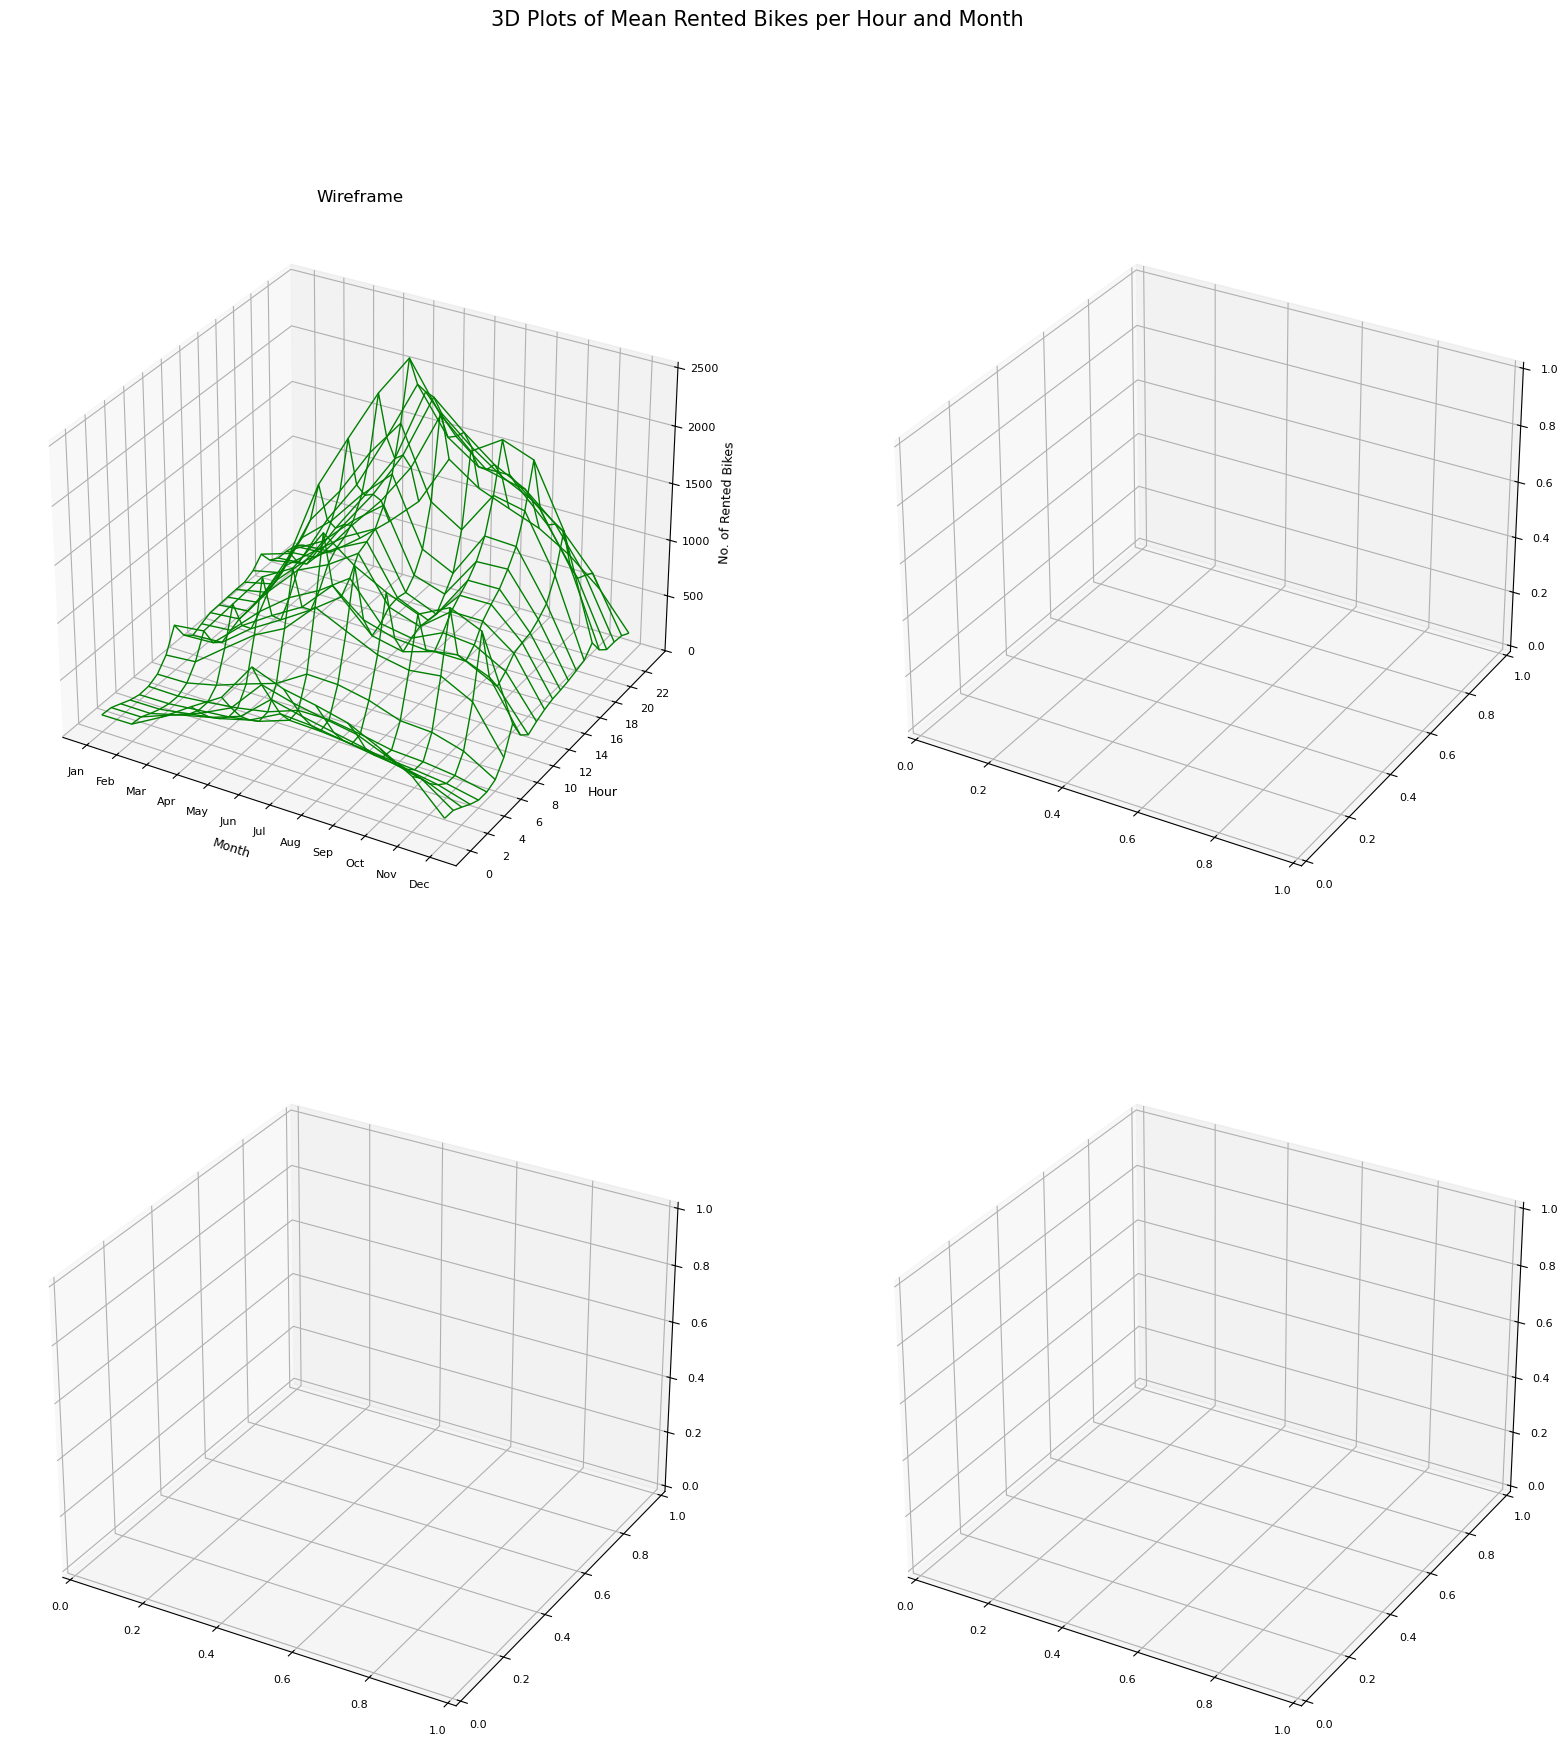

In [65]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(
        figsize = (20,20), nrows =2, ncols = 2, 
    subplot_kw=dict(projection='3d'))
fig.suptitle('3D Plots of Mean Rented Bikes per Hour and Month', 
             fontsize = 15)

ax0.plot_wireframe(X, Y, Z, color="green", linewidth = 1)
ax0.set(xticks = range(1,13,1), xticklabels = order_months,  
            xlabel = "Month",
        yticks = range(0,24,2), yticklabels = range(0,24,2), 
            ylabel = "Hour",
        zlabel = "No. of Rented Bikes",
)
ax0.set_title(label = "Wireframe", fontsize = 12)

plt.show()

### 9. Create and decorate the second subplot—a rotated view of the 3D wireframe plot created in Step 7
- Use ax.plot_wireframe(x, y, z, color='green').
- Set the rotation parameters for your plot using ax.view_init(20, 45).
- This sets elevation = 20 degrees and azimuth = 45 degrees for the rotated view.
- Decorate the axes of your plot like in Step 8.

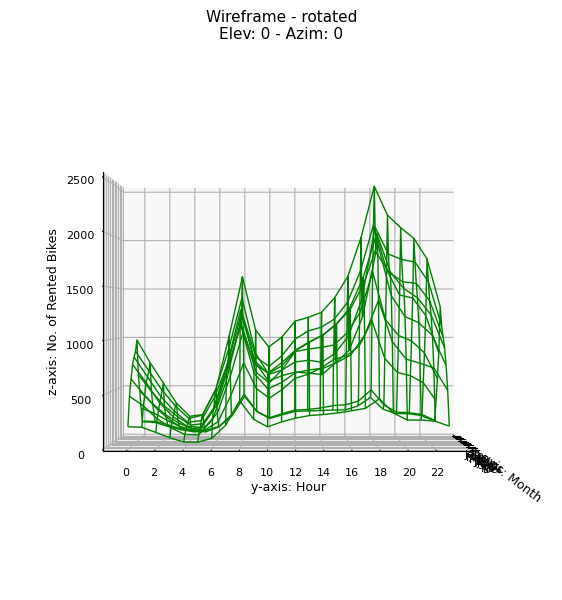

In [66]:
fig, ax = plt.subplots(figsize = (7,7),  subplot_kw=dict(projection='3d'))
ax.plot_wireframe(X, Y, Z, color="green", linewidth = 1)
ax.set( xticks = range(1,13,1), xticklabels = order_months,  xlabel = "x-axis: Month",
        yticks = range(0,24,2), yticklabels = range(0,24,2), ylabel = "y-axis: Hour",
        zlabel = "z-axis: No. of Rented Bikes",
)
ax.view_init(elev = 0, azim= 0)
ax.set_title(label = f"Wireframe - rotated\nElev: {0} - Azim: {0}", fontsize = 11 )
plt.subplots_adjust(top=0.9, wspace = 0.1)
plt.show()


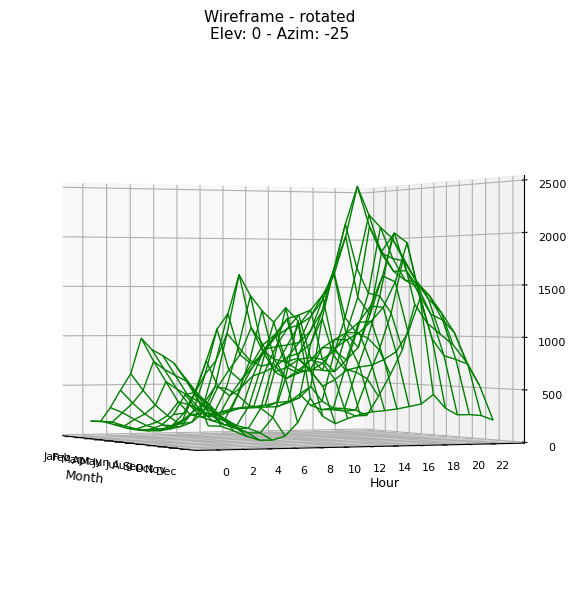

In [67]:
fig, ax = plt.subplots(figsize = (10,7),  
                       subplot_kw=dict(projection='3d'))
ax.plot_wireframe(X, Y, Z, color="green", linewidth = 1)
ax.set( xticks = range(1,13,1), xticklabels = order_months,  
           xlabel = "Month",
        yticks = range(0,24,2), yticklabels = range(0,24,2), 
           ylabel = "Hour",
        zlabel = "No. of Rented Bikes",
)

elev = 0
azim = -25
ax.view_init(elev = elev, azim= azim)
plot_title = f"Wireframe - rotated\nElev: {elev} - Azim: {azim}"
ax.set_title(label = plot_title, fontsize = 11)

plt.show()

In [68]:
fig, ax = plt.subplots(figsize = (10,7),  
                       subplot_kw=dict(projection='3d'))
ax.plot_wireframe(X, Y, Z, color="green", linewidth = 1)
ax.set( xticks = range(1,13,1), xticklabels = order_months,  
           xlabel = "Month",
        yticks = range(0,24,2), yticklabels = range(0,24,2), 
           ylabel = "Hour",
        zlabel = "No. of Rented Bikes",
)

elev = 20
azim = 45
ax.view_init(elev = elev, azim= azim)
plot_title = f"Wireframe - rotated\nElev: {elev} - Azim: {azim}"
ax.set_title(label = plot_title, fontsize = 11)
fig.savefig(img_loc+"Wireframe_rotated.png" , dpi = 400)
plt.show()

In [69]:
fig, ax = plt.subplots(figsize = (10,7),  subplot_kw=dict(projection='3d'))
ax.plot_wireframe(X, Y, Z, color="green", linewidth = 1)
ax.set( xticks = range(1,13,1), xticklabels = order_months,  xlabel = "Month",
        yticks = range(0,24,2), yticklabels = range(0,24,2), ylabel = "Hour",
        zlabel = "No. of Rented Bikes",
)
ax.set_title(label = f"Wireframe - Default values\nElev: {30} - Azim: {-60}", fontsize = 11)
plt.show()

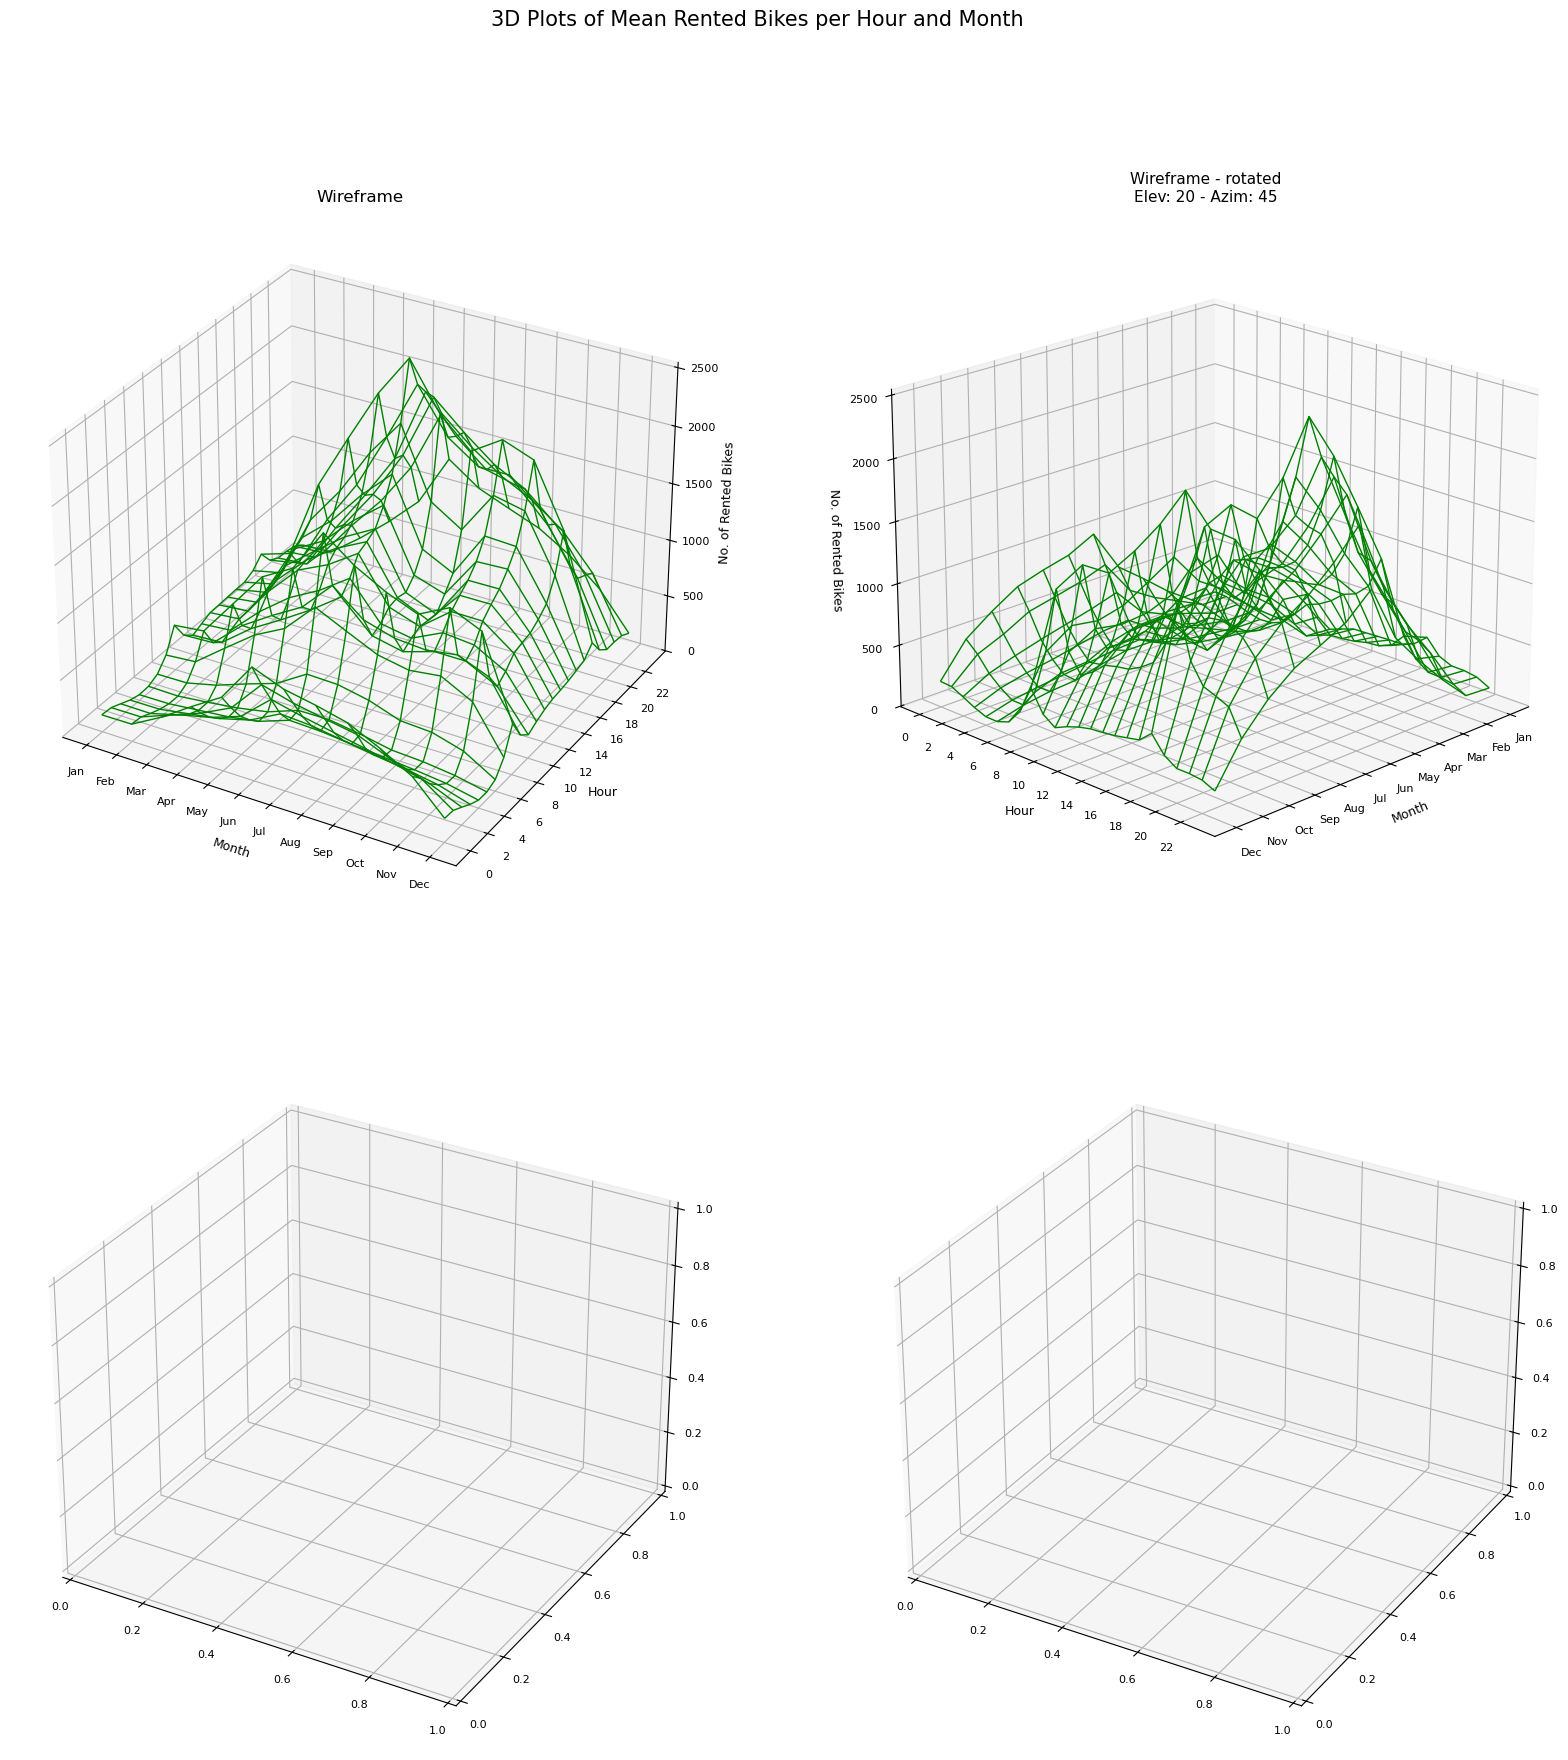

In [70]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(figsize = (20,20), 
        nrows =2, ncols = 2, subplot_kw=dict(projection='3d'))
fig.suptitle('3D Plots of Mean Rented Bikes per Hour and Month', 
             fontsize = 15)

ax0.plot_wireframe(X, Y, Z, color="green", linewidth = 1)
ax0.set(xticks = range(1,13,1), xticklabels = order_months, xlabel = "Month",
        yticks = range(0,24,2), yticklabels = range(0,24,2), ylabel = "Hour",
        zlabel = "No. of Rented Bikes",
)
ax0.set_title(label = 'Wireframe', fontsize = 12)

ax1.plot_wireframe(X, Y, Z, color="green", linewidth = 1)
ax1.set(xticks = range(1,13,1), xticklabels = order_months, xlabel = "Month",
        yticks = range(0,24,2), yticklabels = range(0,24,2), ylabel = "Hour",
        zlabel = "No. of Rented Bikes")
elev = 20
azim = 45
ax1.view_init(elev = elev, azim = azim)
ax1_title = f"Wireframe - rotated\nElev: {elev} - Azim: {azim}"
ax1.set_title(label = ax1_title, fontsize = 11)

plt.show()

### 10. Create and decorate the third subplot—a 3D contour plot using x, y, and z computed in Steps 4 and 5.

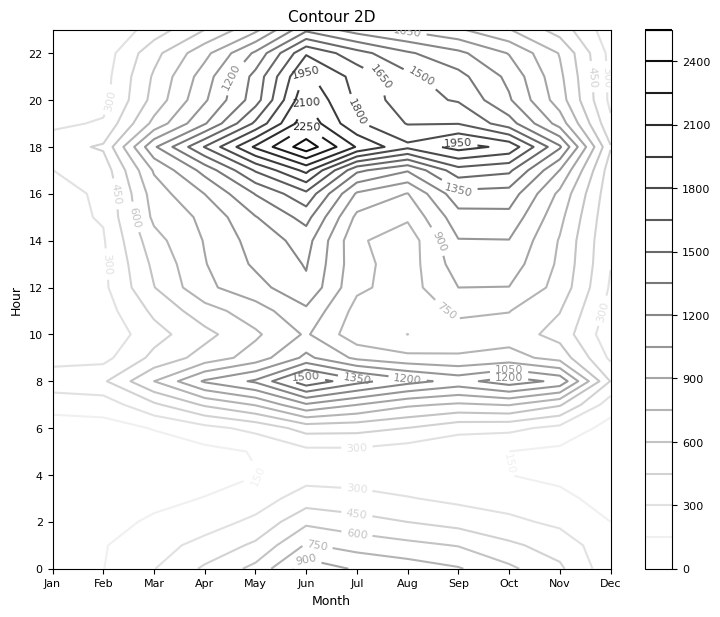

In [71]:
fig, ax = plt.subplots(figsize = (9,7))

contour_plot = ax.contour(X, Y, Z, levels = 20, cmap='binary')

ax.set(xticks = range(1,13,1), xticklabels = order_months,  
       xlabel = "Month",
       yticks = range(0,24,2), yticklabels = range(0,24,2), 
       ylabel = "Hour")
ax.set_title(label = "Contour 2D", fontsize = 11)

plt.colorbar(contour_plot, ax = ax)
plt.clabel(contour_plot, inline = True, fontsize =8)
fig.savefig(img_loc+"Contour_2D.png" , dpi = 400)
plt.show()

#### Colored Contour in 2D

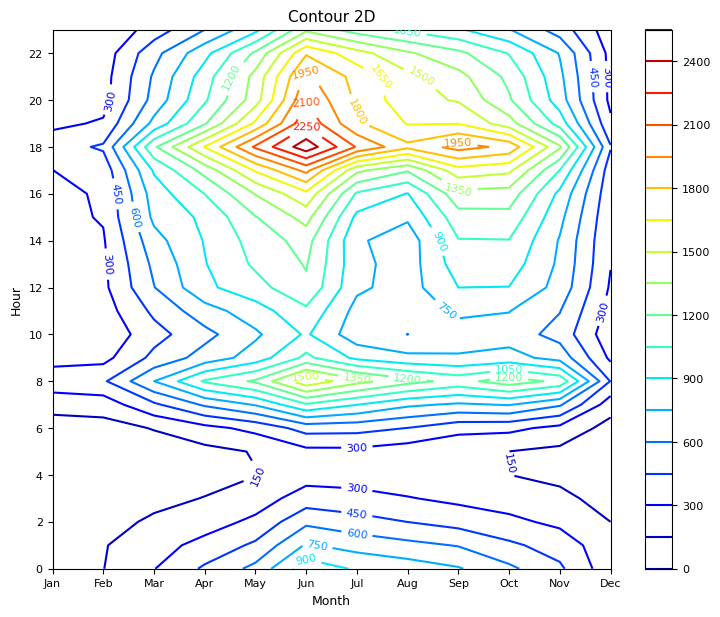

In [72]:
fig, ax = plt.subplots(figsize = (9,7))
contour_plot = ax.contour(X, Y, Z, levels = 20, cmap='jet')
ax.set(xticks = range(1,13,1), xticklabels = order_months,  
       xlabel = "Month",
       yticks = range(0,24,2), yticklabels = range(0,24,2), 
       ylabel = "Hour")
ax.set_title(label = "Contour 2D", fontsize = 11)
fig.colorbar(contour_plot, ax = ax)
ax.clabel(contour_plot, inline = True, fontsize =8)
fig.savefig(img_loc+"Colored_Contour_2D.png" , dpi = 400)
plt.show()

In [73]:
X

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 1,  2,  3,  4,  5,  6,

In [74]:
fig, ax = plt.subplots(figsize = (9,7), 
                       subplot_kw=dict(projection='3d'))
contour_plot = ax.contour(X, Y, Z, levels = 20, cmap='jet')
ax.set(xticks = range(1,13,1), xticklabels = order_months,  
       xlabel = "Month",
       yticks = range(0,24,2), yticklabels = range(0,24,2), 
       ylabel = "Hour",
       zlabel = "No. of Rented Bikes")
ax.set_title(label = "Contour 3D", fontsize = 11)
fig.colorbar(contour_plot, ax = ax)

plt.show()

#### Contour 3D

In [75]:
fig, ax = plt.subplots(figsize = (9,7), subplot_kw=dict(projection='3d'))
contour_plot = ax.contour(X, Y, Z, levels = 50, cmap='jet')
ax.set(xticks = range(1,13,1), xticklabels = order_months,  xlabel = "Month",
       yticks = range(0,24,2), yticklabels = range(0,24,2), ylabel = "Hour",
       zlabel = "No. of Rented Bikes")
ax.set_title(label = "Contour 3D", fontsize = 11)
fig.colorbar(contour_plot, ax = ax, shrink = 0.8)
fig.savefig(img_loc+"Colored_Contour_3D.png" , dpi = 400)
plt.show()

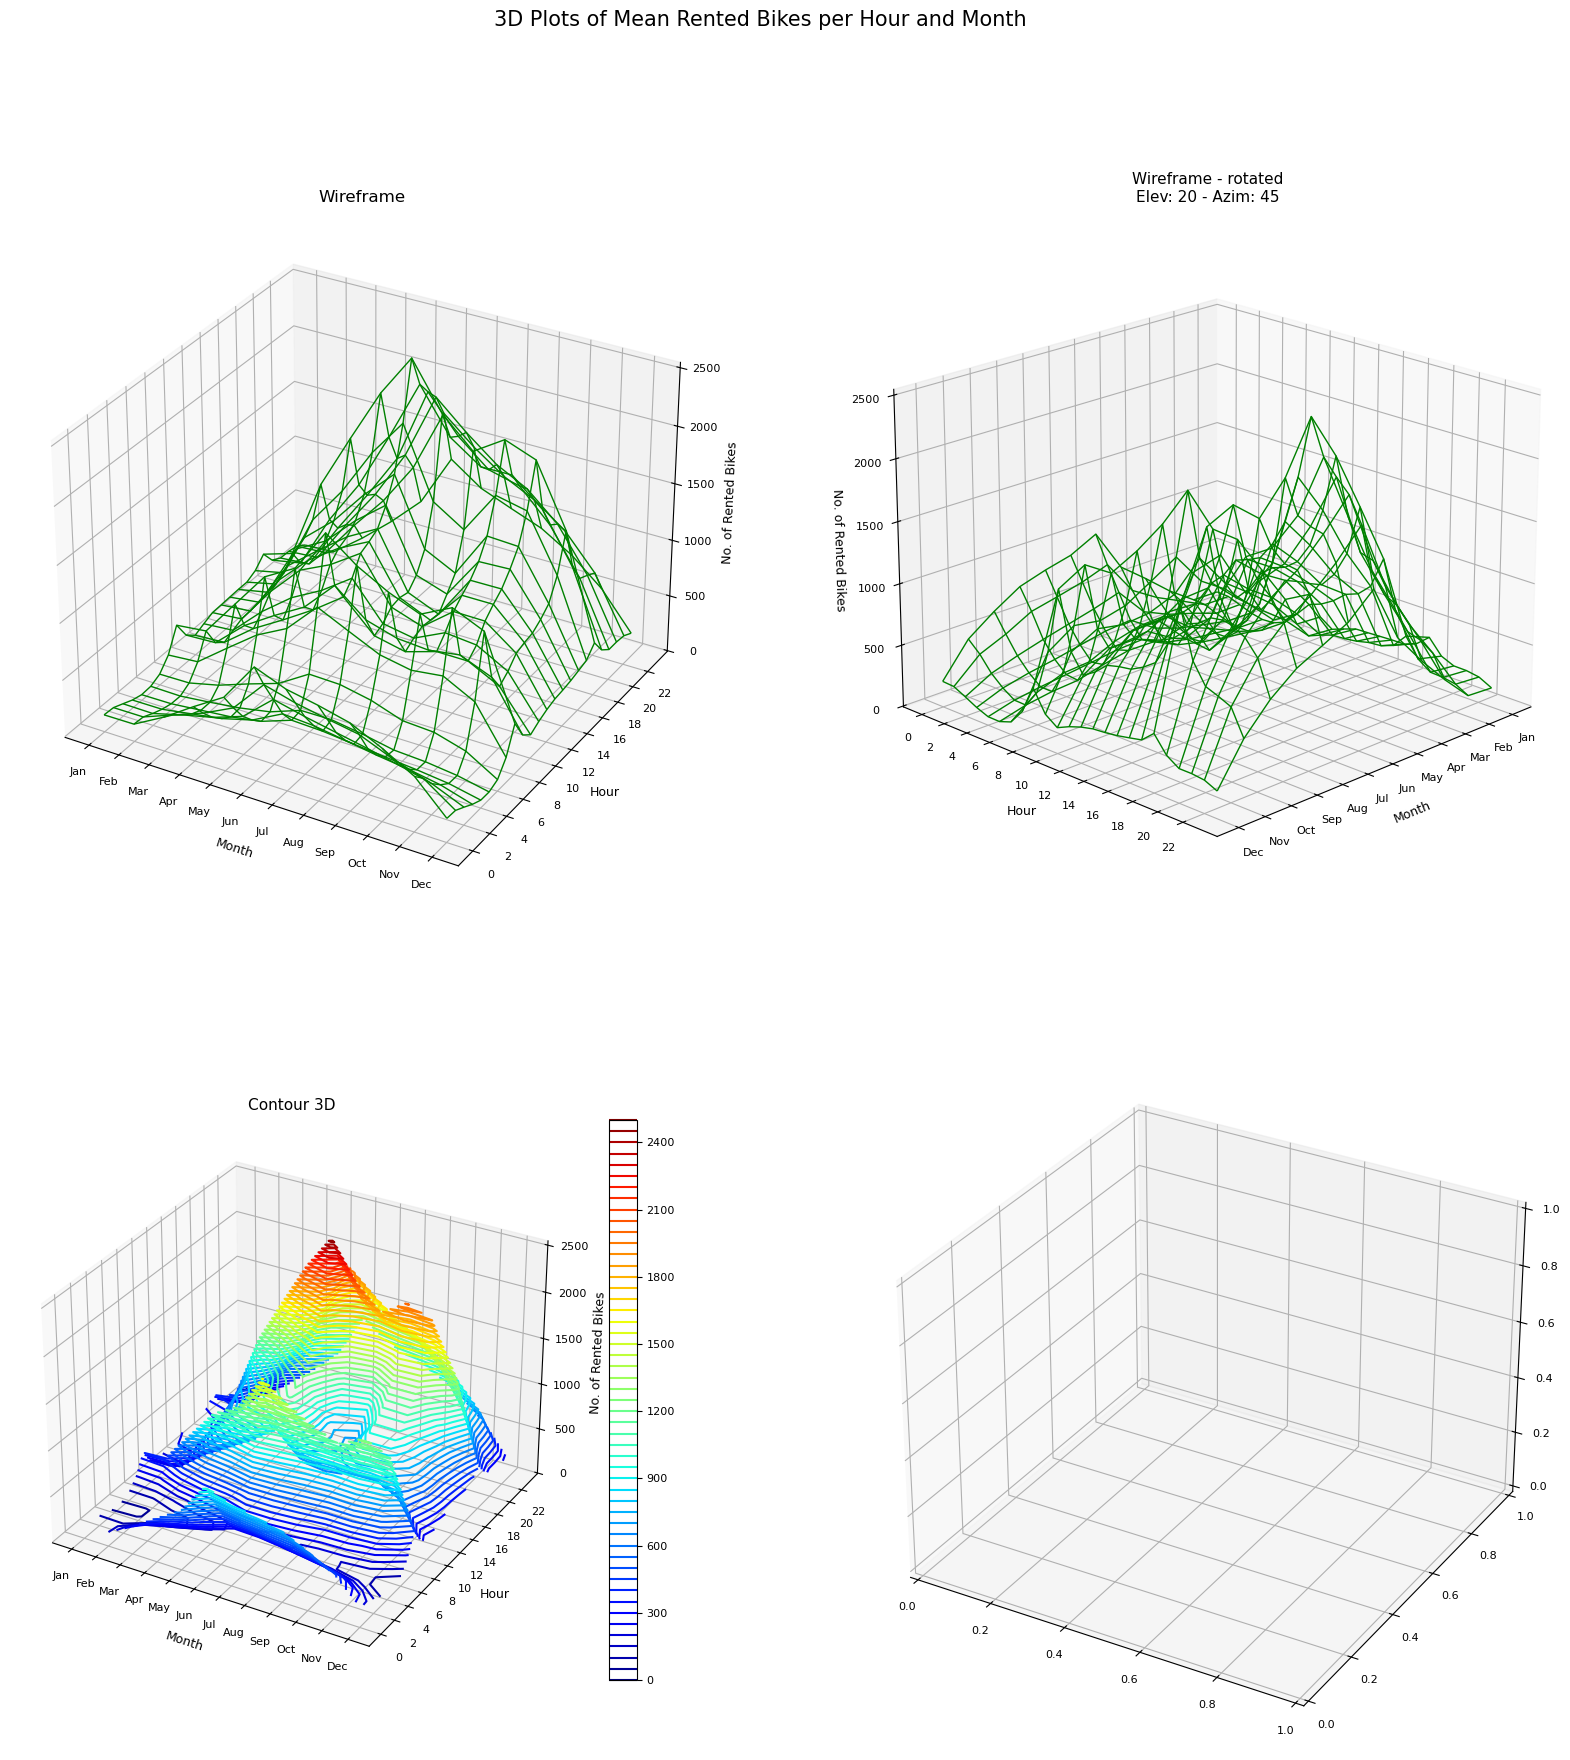

In [76]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(figsize = (20,20), 
        nrows =2, ncols = 2, subplot_kw=dict(projection='3d'))
fig.suptitle('3D Plots of Mean Rented Bikes per Hour and Month', 
             fontsize = 15)

ax0.plot_wireframe(X, Y, Z, color="green", linewidth = 1)
ax0.set(xticks = range(1,13,1), xticklabels = order_months, xlabel = "Month",
        yticks = range(0,24,2), yticklabels = range(0,24,2), ylabel = "Hour",
        zlabel = "No. of Rented Bikes",
)
ax0.set_title(label = 'Wireframe', fontsize = 12)

ax1.plot_wireframe(X, Y, Z, color="green", linewidth = 1)
ax1.set(xticks = range(1,13,1), xticklabels = order_months, xlabel = "Month",
        yticks = range(0,24,2), yticklabels = range(0,24,2), ylabel = "Hour",
        zlabel = "No. of Rented Bikes")
elev = 20
azim = 45
ax1.view_init(elev = elev, azim = azim)
ax1_title = f"Wireframe - rotated\nElev: {elev} - Azim: {azim}"
ax1.set_title(label = ax1_title, fontsize = 11)

contour_plot = ax2.contour(X, Y, Z, levels = 50, cmap='jet')
ax2.set(xticks = range(1,13,1), xticklabels = order_months,  xlabel = "Month",
       yticks = range(0,24,2), yticklabels = range(0,24,2), ylabel = "Hour",
       zlabel = "No. of Rented Bikes")
ax2.set_title(label = "Contour 3D", fontsize = 11)
fig.colorbar(contour_plot, ax = ax2, shrink = 0.8)

plt.show()

### 11. Create and decorate the fourth subplot—a 3D surface plot using x, y, and z computed in Steps 4 and 5.

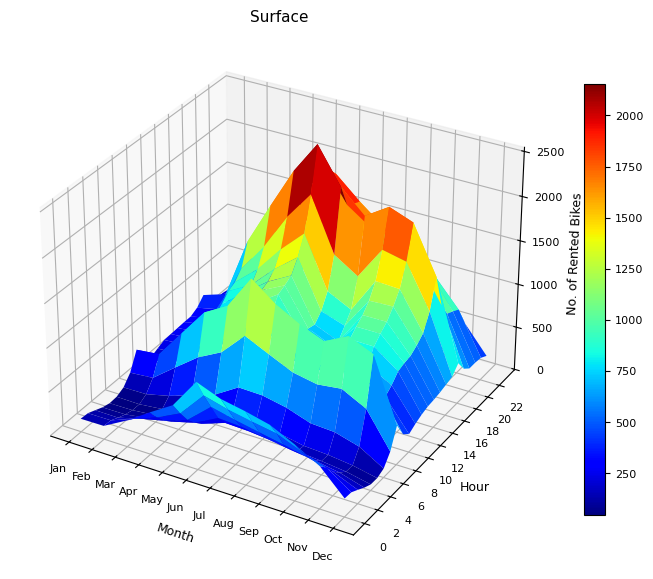

In [77]:
fig, ax = plt.subplots(figsize = (9,7), 
                       subplot_kw=dict(projection='3d'))
surface_plot = ax.plot_surface(X, Y, Z, cmap='jet')
ax.set(xticks = range(1,13,1), xticklabels = order_months,  
       xlabel = "Month",
       yticks = range(0,24,2), yticklabels = range(0,24,2), 
       ylabel = "Hour",
       zlabel = "No. of Rented Bikes")
ax.set_title(label = "Surface", fontsize = 11)
fig.colorbar(surface_plot, ax = ax, shrink = 0.8)
fig.savefig(img_loc+"Surface.png" , dpi = 400)
plt.show()

In [78]:
plt.rcParams['figure.subplot.wspace']

0.2

In [79]:
plt.rcParams['figure.subplot.hspace']

0.2

In [80]:
plt.rc("figure.subplot", wspace = 0.2)

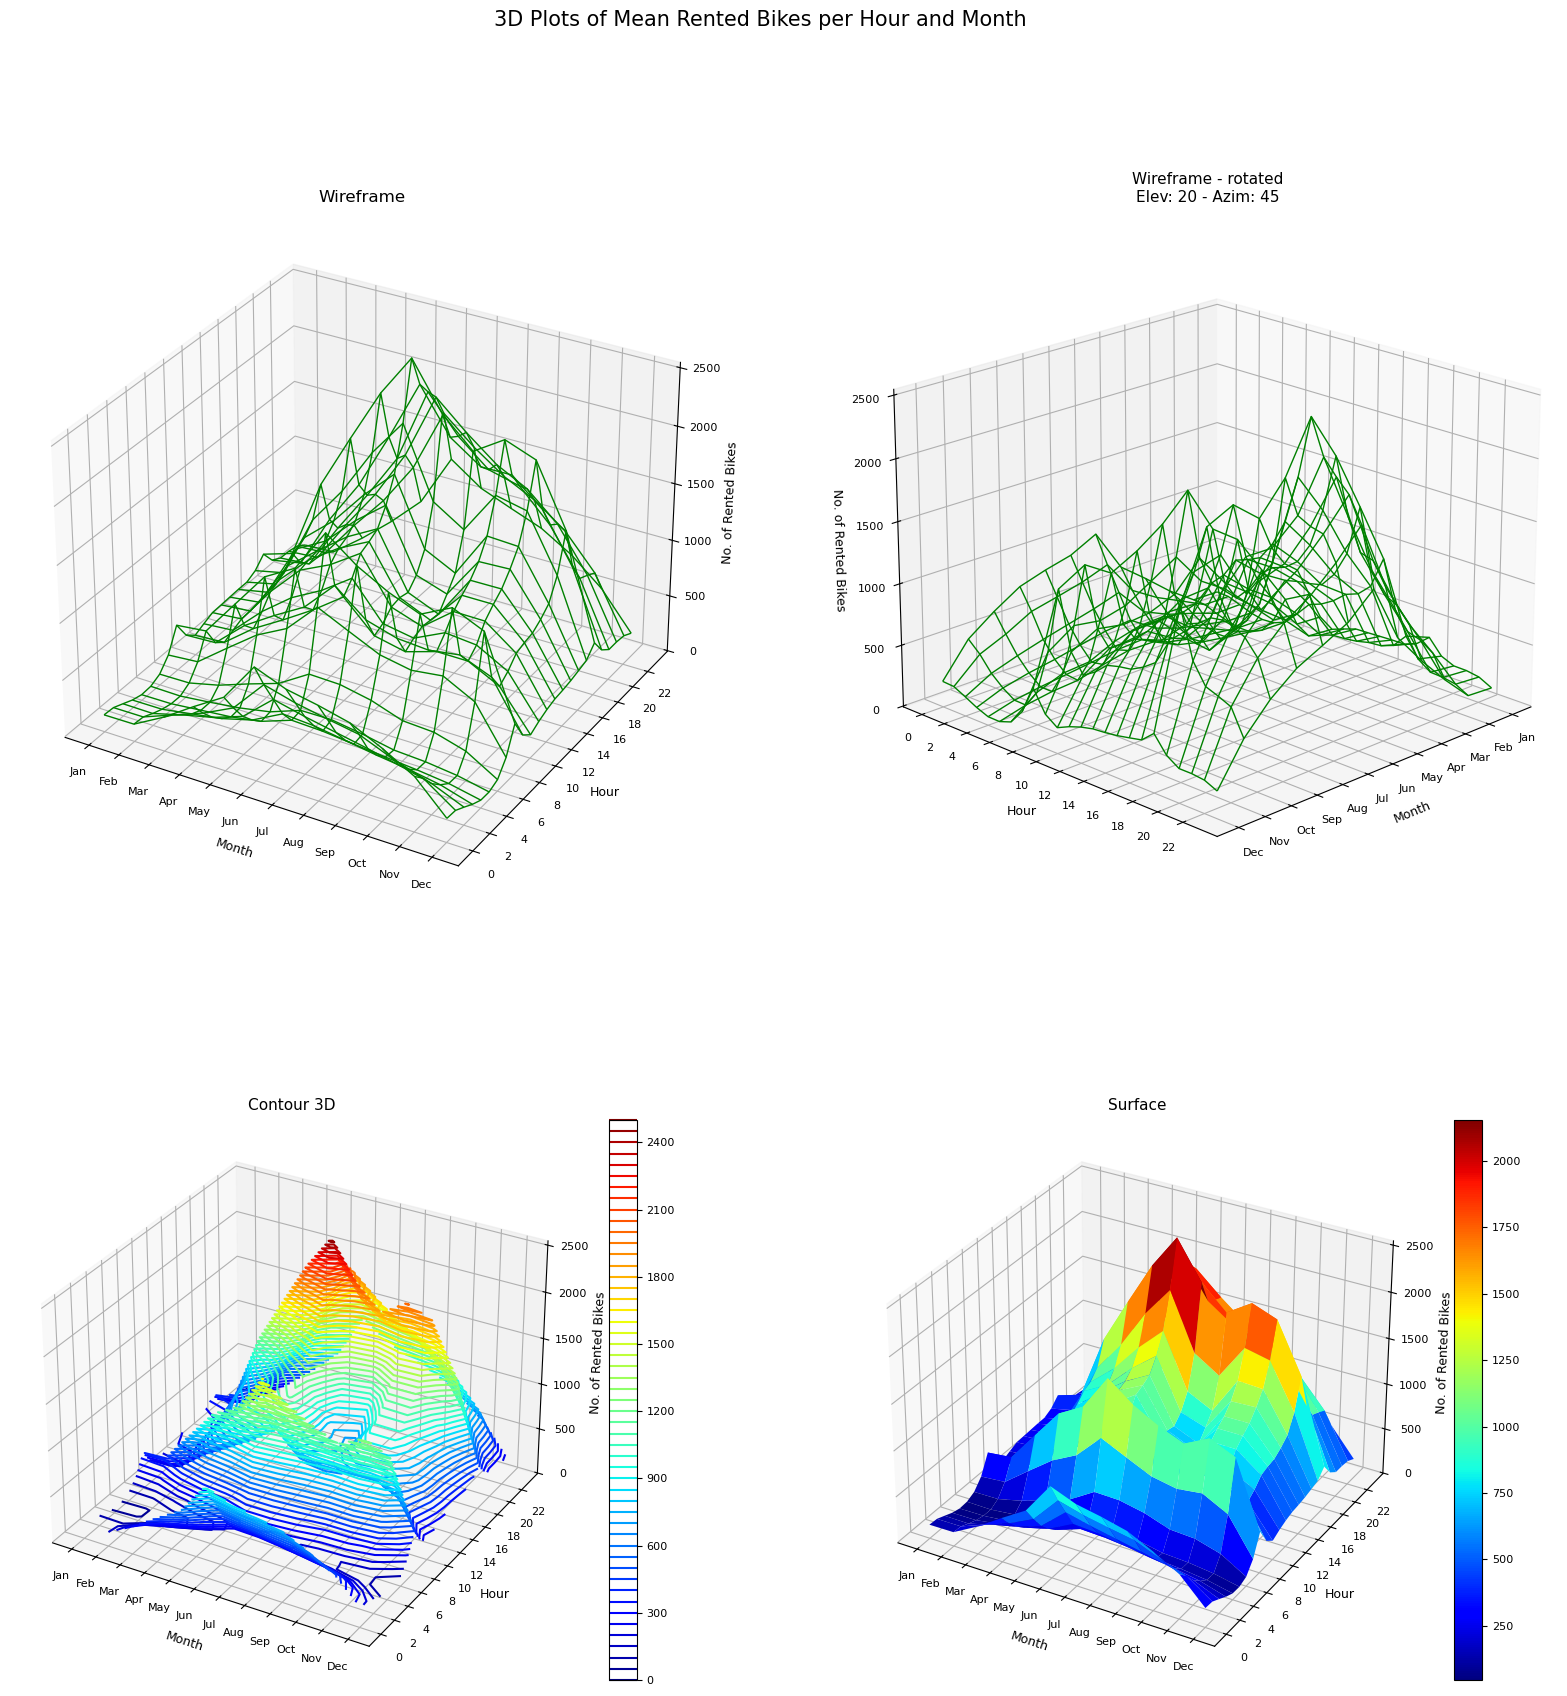

In [81]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(figsize = (20,20), 
        nrows =2, ncols = 2, subplot_kw=dict(projection='3d'))
fig.suptitle('3D Plots of Mean Rented Bikes per Hour and Month', 
             fontsize = 15)

ax0.plot_wireframe(X, Y, Z, color="green", linewidth = 1)
ax0.set(xticks = range(1,13,1), xticklabels = order_months, xlabel = "Month",
        yticks = range(0,24,2), yticklabels = range(0,24,2), ylabel = "Hour",
        zlabel = "No. of Rented Bikes",
)
ax0.set_title(label = 'Wireframe', fontsize = 12)

ax1.plot_wireframe(X, Y, Z, color="green", linewidth = 1)
ax1.set(xticks = range(1,13,1), xticklabels = order_months, xlabel = "Month",
        yticks = range(0,24,2), yticklabels = range(0,24,2), ylabel = "Hour",
        zlabel = "No. of Rented Bikes")
elev = 20
azim = 45
ax1.view_init(elev = elev, azim = azim)
ax1_title = f"Wireframe - rotated\nElev: {elev} - Azim: {azim}"
ax1.set_title(label = ax1_title, fontsize = 11)

contour_plot = ax2.contour(X, Y, Z, levels = 50, cmap='jet')
ax2.set(xticks = range(1,13,1), xticklabels = order_months,  xlabel = "Month",
       yticks = range(0,24,2), yticklabels = range(0,24,2), ylabel = "Hour",
       zlabel = "No. of Rented Bikes")
ax2.set_title(label = "Contour 3D", fontsize = 11)
fig.colorbar(contour_plot, ax = ax2, shrink = 0.8)

surface_plot = ax3.plot_surface(X, Y, Z, cmap='jet')
ax3.set(xticks = range(1,13,1), xticklabels = order_months,  xlabel = "Month",
        yticks = range(0,24,2), yticklabels = range(0,24,2), ylabel = "Hour",
        zlabel = "No. of Rented Bikes")
ax3.set_title(label = "Surface", fontsize = 11)
fig.colorbar(surface_plot, ax = ax3, shrink = 0.8)

plt.show()

In [82]:
fig.savefig("P2_M3.png", dpi = 300)

[]

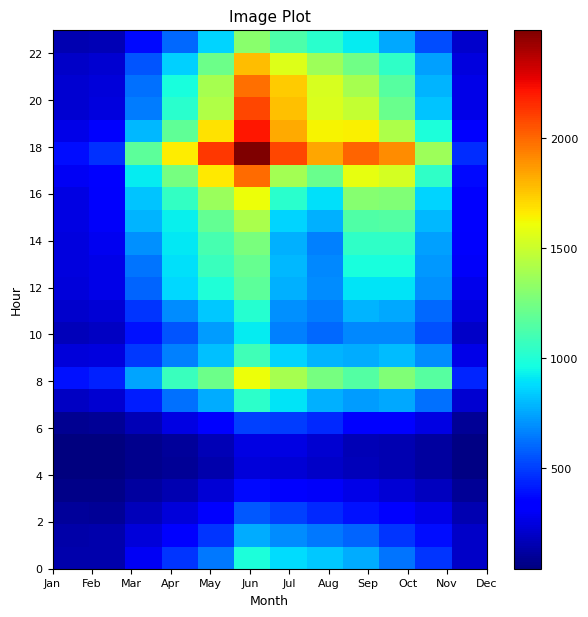

In [83]:
fig, ax = plt.subplots(figsize = (7,7))
img_plot = ax.imshow(Z, extent = [1, 12, 0, 23], origin = 'lower', cmap='jet', aspect = 'auto')
fig.colorbar(img_plot, ax = ax)
ax.set(xticks = range(1,13,1), xticklabels = order_months,  xlabel = "Month",
            yticks = range(0,24,2), yticklabels = range(0,24,2), ylabel = "Hour"            
            )
ax.set_title(label = "Image Plot", fontsize = 11)
fig.savefig(img_loc+"Image_Plot.png" , dpi = 400)
plt.plot()

In [84]:
# plt.rcParams['figure.constrained_layout.use'] = False

In [85]:
import seaborn as sns

### 12. Save your plots as a png file with a resolution of 300 dpi

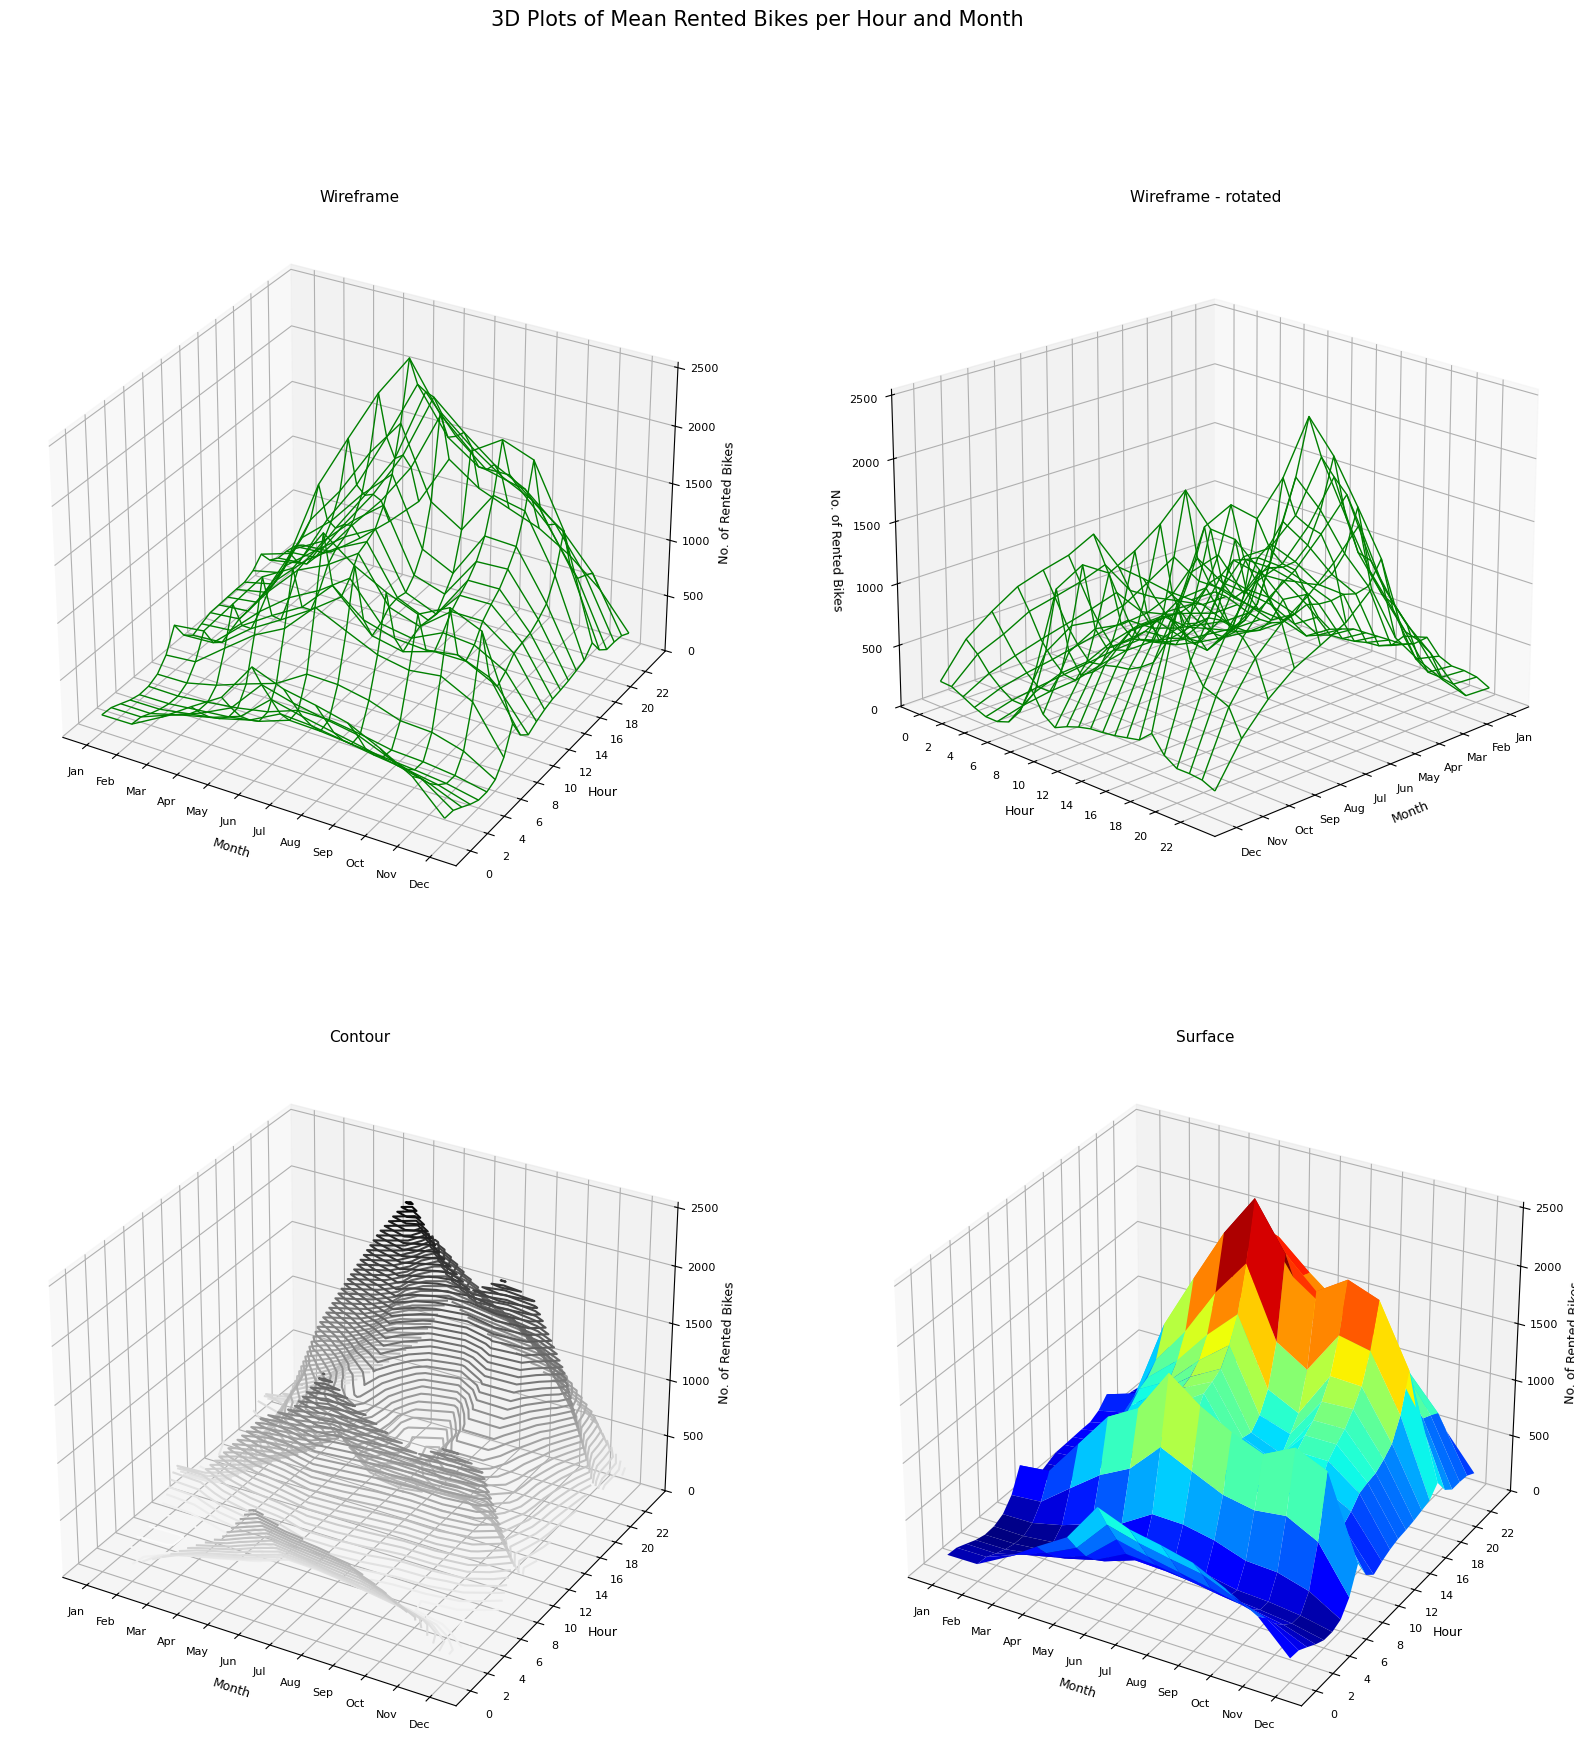

In [86]:
fig, ((ax_wire, ax_wire_rot), (ax_cont, ax_surf)) = plt.subplots(figsize = (20,20), nrows =2, ncols = 2, subplot_kw=dict(projection='3d'))
fig.suptitle('3D Plots of Mean Rented Bikes per Hour and Month', fontsize = 15)

ax_wire.plot_wireframe(X, Y, Z, color="green", linewidth = 1)
ax_wire.set(xticks = range(1,13,1), xticklabels = order_months,  xlabel = "Month",
            yticks = range(0,24,2), yticklabels = range(0,24,2), ylabel = "Hour",
            zlabel = "No. of Rented Bikes",
            )
ax_wire.set_title(label = "Wireframe", fontsize = 11)

ax_wire_rot.plot_wireframe(X, Y, Z, color="green", linewidth = 1)
ax_wire_rot.view_init(20,45)
ax_wire_rot.set(xticks = range(1,13,1), xticklabels = order_months,  xlabel = "Month",
            yticks = range(0,24,2), yticklabels = range(0,24,2), ylabel = "Hour",
            zlabel = "No. of Rented Bikes",
            )
ax_wire_rot.set_title(label = "Wireframe - rotated", fontsize = 11)

ax_cont.contour3D(X, Y, Z, 50, cmap='binary')
ax_cont.set(xticks = range(1,13,1), xticklabels = order_months,  xlabel = "Month",
            yticks = range(0,24,2), yticklabels = range(0,24,2), ylabel = "Hour",
            zlabel = "No. of Rented Bikes",
            )
ax_cont.set_title(label = "Contour", fontsize = 11)

ax_surf.plot_surface(X, Y, Z, cmap='jet', linewidth=0, antialiased=True)
ax_surf.set(xticks = range(1,13,1), xticklabels = order_months,  xlabel = "Month",
            yticks = range(0,24,2), yticklabels = range(0,24,2), ylabel = "Hour",
            zlabel = "No. of Rented Bikes",
            )
ax_surf.set_title(label = "Surface", fontsize = 11)

fig.savefig("P2_M3.png", dpi = 300)
plt.show()